In [2]:
import matplotlib.pyplot as pp
import numpy as np

def plotSpectrum(spektrum, m, Xmin, Xmax, Ymin, Ymax, filename): #plots spectrum
    p = list_plot([beta_complex(l) for l in spektrum], axes_labels=['Re','Im'],axes_labels_size=1, size=20, color = Color(1.0,0.0, 0.35))
#     ar = np.sort([beta_complex(l) for l in spektrum])
#     p = pp.plot(ar, np.zeros_like(ar), '.',color = (1.0,0.0, 0.35), aspect_ratio=1, axes = False)
#     pp.axes('off')
#     pp.show()
    p.show(xmin = Xmin, xmax = Xmax, ymin = Ymin, ymax = Ymax, aspect_ratio = 1)
    p.save(filename, aspect_ratio = 1)
    
def vytvoritRetezec(k, i): #creates a list from D[k] and digit i
    pomocna = list(SS[k])
    pomocna = list([i] + pomocna[0:pocetPozic-2])
    return list(pomocna) 

def pridatNovyPrvek(k, i, rad): #adds a new element a checks if it can not be rewritten
    retezec = vytvoritRetezec(k, i)
    spektrum.append(tau*spektrum[k]+i) #pridani noveho prvku do mnoziny
    SS.append(retezec)
            
def getSpectrumForM(spektrum, A, maxRad, Xmin, Xmax, Ymin, Ymax, filename): #generating of the spectrum upto the power maxRad
    pocetNovychPrvku = []
    pocetNovychPrvku.append(len(A))
    sumaPrvkuNizsihoRadu = 0
    m = 1
    print ""
    print " m = ", m
    print pocetNovychPrvku[len(pocetNovychPrvku)-1]
    plotSpectrum(spektrum, m, Xmin, Xmax, Ymin, Ymax, filename)
    for rad in range(1, maxRad):
        m = rad +1
        for k in range(sumaPrvkuNizsihoRadu, sum(pocetNovychPrvku)): #iteration over existing elements created in previous iteration
            for i in A: 
                novy = 1 
                for j in spektrum: #comparison with existing elements of the spectrum
                    if tau*spektrum[k] + i == j: #comparison of values
                        novy = 0
                if novy == 1:
                    if abs(beta_complex(tau*spektrum[k]+i)) !=0:
                        pridatNovyPrvek(k, i, rad)                      
        sumaPrvkuNizsihoRadu = sum(pocetNovychPrvku) #actual number of elements from the all iteration (except the last)
        pocetNovychPrvku.append(len(spektrum)-sumaPrvkuNizsihoRadu) #adding of the number of elements from the last iteration
        print "m = ", m
        print pocetNovychPrvku[len(pocetNovychPrvku)-1]
        plotSpectrum(spektrum, m, Xmin, Xmax, Ymin, Ymax, filename) #ploting of the spectrum
print "Run"    



Run


In [4]:
import numpy
Q = QQ['x']
x = Q.gen()

f = x**4 +x**3+x**2+x +1 #petiuhelnik

###############################################################################################################

print "Je ireducibilni: ", f.is_irreducible() #vypise jestli je dany polynom f ireducibilni nad Q

N.<beta> = NumberField(f) #vrati koren nejbliz k embedding
print N #vypise co je N a co je beta

roots = beta.complex_embeddings()
print roots #vypise koreny polynomu f

pocetMimoK = 0
pozice = 0
for i in range(f.degree()):
    if abs(roots[i])>=1:
        pocetMimoK = pocetMimoK + 1
        pozice = i
        print pozice

pisot = 0
kPisot = 0

if (pocetMimoK == 2) & (not roots[pozice].is_real()): #zjisti jestli je beta Pisot nebo komplex Pisot
    print("Beta je komplex Pisot")
    kPisot = 1
    pozice = pozice - 1
elif (pocetMimoK == 1) & roots[pozice].is_real() & (beta > 1):
    print("Beta je Pisot")
    pisot = 1
else: 
    print("Beta neni ani Pisot ani komplex Pisot")
    
print N.places()
beta_complex = N.places()[pozice]  #better then it looks .. solves EVERYTHING!!!!!!!!!!!
print "beta = ", beta_complex(beta)

tau = -beta-beta**4
print  " baze je ", beta_complex(tau)

A = [0, beta, beta**2, beta**3, beta**4, beta**5]
print "Abeceda A = ", A
print ""

print ""
if (pisot == 1) or (kPisot==1): 

    spektrum = [] #mnozina PRVKU V TELESE ze spektra uvnitr
    spektrum = list(A)
    SS = [] #mnozina PUVODNICH HODNOT prvku ze spektra

########################################

    pocetPozic = 9
    radBeta = 8

########################################

    pomocna = [0 for i in range(pocetPozic)]
    for i in A: #PRIDA na zacatek mnoziny puvodnich hodnot ABECEDU
        pomocna[0] = i
        SS.append(list(pomocna))

    getSpectrumForM(spektrum, A, 8)
        
        #p.save('spektrumM=5.pdf')
            
print "FINISHED"

Je ireducibilni:  True
Number Field in beta with defining polynomial x^4 + x^3 + x^2 + x + 1
[-0.809016994374947 - 0.587785252292473*I, -0.809016994374947 + 0.587785252292473*I, 0.309016994374947 - 0.951056516295154*I, 0.309016994374947 + 0.951056516295154*I]
0
1
Beta je komplex Pisot
[Ring morphism:
  From: Number Field in beta with defining polynomial x^4 + x^3 + x^2 + x + 1
  To:   Complex Field with 53 bits of precision
  Defn: beta |--> -0.809016994374947 + 0.587785252292473*I, Ring morphism:
  From: Number Field in beta with defining polynomial x^4 + x^3 + x^2 + x + 1
  To:   Complex Field with 53 bits of precision
  Defn: beta |--> 0.309016994374947 + 0.951056516295154*I]
beta =  -0.809016994374947 + 0.587785252292473*I
 baze je  1.61803398874989 + 5.55111512312578e-17*I
Abeceda A =  [0, beta, beta^2, beta^3, -beta^3 - beta^2 - beta - 1, 1]




TypeError: getSpectrumForM() takes exactly 8 arguments (3 given)

Je ireducibilni:  True
Number Field in beta with defining polynomial x^2 - x - 1
[-0.618033988749895, 1.61803398874989]
1
Beta je Pisot
[Ring morphism:
  From: Number Field in beta with defining polynomial x^2 - x - 1
  To:   Real Field with 106 bits of precision
  Defn: beta |--> -0.6180339887498948482045868343656, Ring morphism:
  From: Number Field in beta with defining polynomial x^2 - x - 1
  To:   Real Field with 106 bits of precision
  Defn: beta |--> 1.618033988749894848204586834366]
beta =  1.618033988749894848204586834366


 m =  1
3


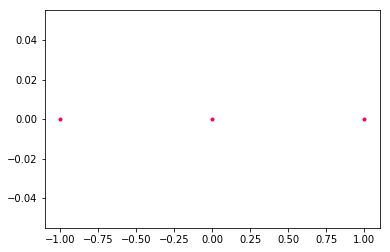

m =  2
6


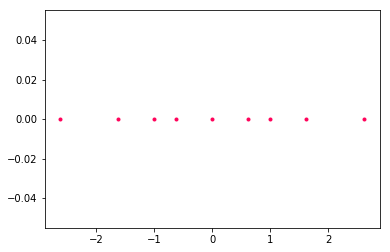

m =  3
10


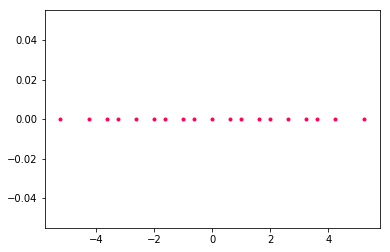

m =  4
18


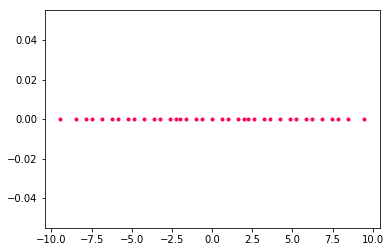

m =  5
30


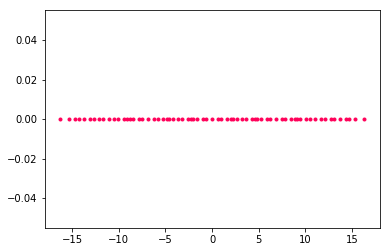

m =  6
50


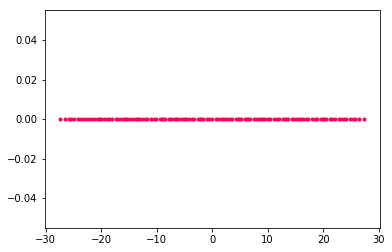

m =  7
82


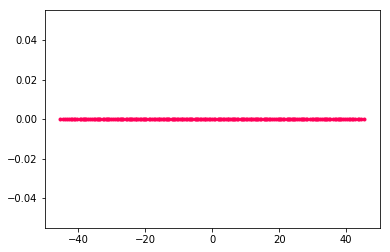

m =  8
134


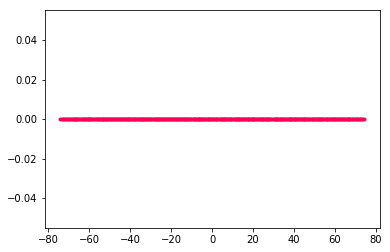

FINISHED


In [37]:
import numpy
Q = QQ['x']
x = Q.gen()

f = x**2-x-1   #zlaty rez
A = [0, 1, -1]

print "Je ireducibilni: ", f.is_irreducible() #vypise jestli je dany polynom f ireducibilni nad Q

N.<beta> = NumberField(f) #vrati koren nejbliz k embedding
print N #vypise co je N a co je beta

roots = beta.complex_embeddings()
print roots #vypise koreny polynomu f

pocetMimoK = 0
pozice = 0
for i in range(f.degree()):
    if abs(roots[i])>=1:
        pocetMimoK = pocetMimoK + 1
        pozice = i
        print pozice

pisot = 0
kPisot = 0

if (pocetMimoK == 2) & (not roots[pozice].is_real()): #zjisti jestli je beta Pisot nebo komplex Pisot
    print("Beta je komplex Pisot")
    kPisot = 1
    pozice = pozice - 1
elif (pocetMimoK == 1) & roots[pozice].is_real() & (beta > 1):
    print("Beta je Pisot")
    pisot = 1
else: 
    print("Beta neni ani Pisot ani komplex Pisot")
    
print N.places()
beta_complex = N.places()[pozice]  #better then it looks .. solves EVERYTHING!!!!!!!!!!!
print "beta = ", beta_complex(beta)

tau = beta

print ""
if (pisot == 1) or (kPisot==1): 

    spektrum = [] #mnozina PRVKU V TELESE ze spektra uvnitr
    spektrum = list(A)
    SS = [] #mnozina PUVODNICH HODNOT prvku ze spektra

########################################

    pocetPozic = 9
    radBeta = 8

########################################

    pomocna = [0 for i in range(pocetPozic)]
    for i in A: #PRIDA na zacatek mnoziny puvodnich hodnot ABECEDU
        pomocna[0] = i
        SS.append(list(pomocna))

    getSpectrumForM(spektrum, A, 8, -25, 25, -25, 25, 'goldenRatio.pdf')
            
print "FINISHED"

Je ireducibilni:  True
Number Field in beta with defining polynomial x^2 + 3*x + 3
[-1.50000000000000 - 0.866025403784439*I, -1.50000000000000 + 0.866025403784439*I]
0
1
Beta je komplex Pisot
[Ring morphism:
  From: Number Field in beta with defining polynomial x^2 + 3*x + 3
  To:   Complex Field with 53 bits of precision
  Defn: beta |--> -1.50000000000000 + 0.866025403784439*I]
beta =  -1.50000000000000 + 0.866025403784439*I
6.00000000000000


 m =  1
7


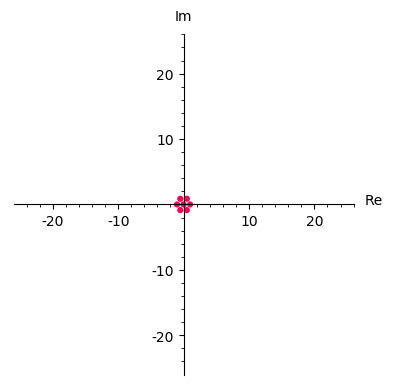

m =  2
24


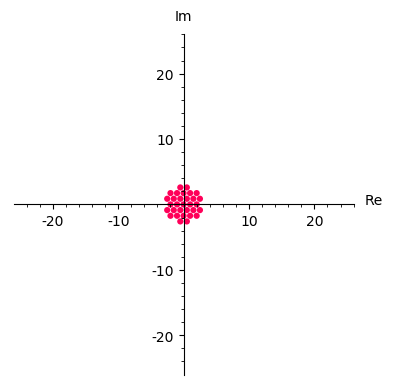

m =  3
84


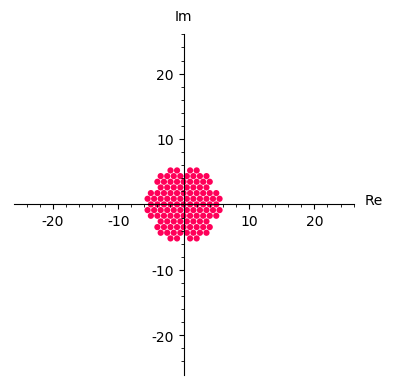

m =  4
276


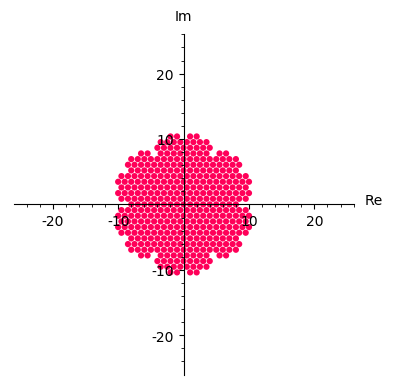

m =  5
876


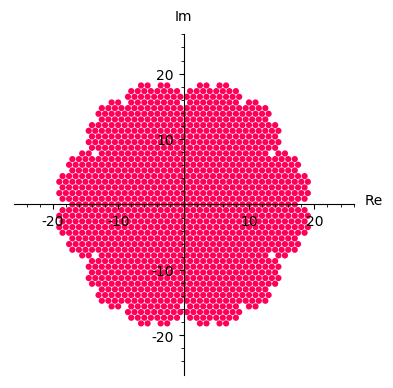

m =  6
2712


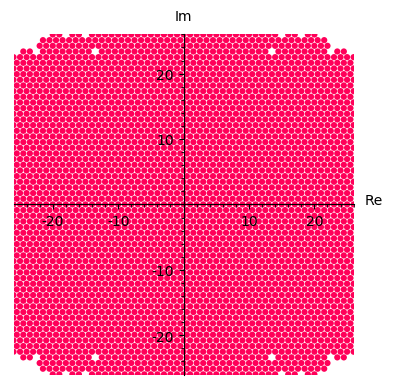

KeyboardInterrupt: 

In [4]:
import numpy
Q = QQ['x']
x = Q.gen()

f = x**2+3*x+3 # redundant Eisenstein system

print "Je ireducibilni: ", f.is_irreducible() #vypise jestli je dany polynom f ireducibilni nad Q

N.<beta> = NumberField(f) #vrati koren nejbliz k embedding
print N #vypise co je N a co je beta

A = [0, 1, -1, beta+1, -beta-1, 1/(beta+1), -1/(beta+1)]

roots = beta.complex_embeddings()
print roots #vypise koreny polynomu f

pocetMimoK = 0
pozice = 0
for i in range(f.degree()):
    if abs(roots[i])>=1:
        pocetMimoK = pocetMimoK + 1
        pozice = i
        print pozice

pisot = 0
kPisot = 0

if (pocetMimoK == 2) & (not roots[pozice].is_real()): #zjisti jestli je beta Pisot nebo komplex Pisot
    print("Beta je komplex Pisot")
    kPisot = 1
    pozice = pozice - 1
elif (pocetMimoK == 1) & roots[pozice].is_real() & (beta > 1):
    print("Beta je Pisot")
    pisot = 1
else: 
    print("Beta neni ani Pisot ani komplex Pisot")
    
print N.places()
beta_complex = N.places()[pozice]  #better then it looks .. solves EVERYTHING!!!!!!!!!!!
print "beta = ", beta_complex(beta)

tau = beta

print beta_complex(beta*beta.conjugate())  + abs(beta_complex(beta + beta.conjugate()))

print ""
if (pisot == 1) or (kPisot==1): 

    spektrum = [] #mnozina PRVKU V TELESE ze spektra uvnitr
    spektrum = list(A)
    SS = [] #mnozina PUVODNICH HODNOT prvku ze spektra

########################################

    pocetPozic = 9
    radBeta = 8

########################################

    pomocna = [0 for i in range(pocetPozic)]
    for i in A: #PRIDA na zacatek mnoziny puvodnich hodnot ABECEDU
        pomocna[0] = i
        SS.append(list(pomocna))

    getSpectrumForM(spektrum, A, 8, -25, 25, -25, 25, 'eisenstein.pdf')
#     getSpectrumForM(spektrum, A, 4, -5.5, 5.5, -5.5, 5.5, 'eisensteinGrid.pdf')

print "FINISHED"

Je ireducibilni:  True
Number Field in beta with defining polynomial x^2 + 2*x + 2
[-1.00000000000000 - 1.00000000000000*I, -1.00000000000000 + 1.00000000000000*I]
0
1
Beta je komplex Pisot
[Ring morphism:
  From: Number Field in beta with defining polynomial x^2 + 2*x + 2
  To:   Complex Field with 53 bits of precision
  Defn: beta |--> -1.00000000000000 + 1.00000000000000*I]
beta =  -1.00000000000000 + 1.00000000000000*I


 m =  1
5


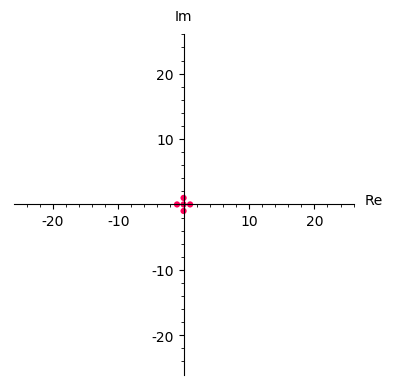

m =  2
12


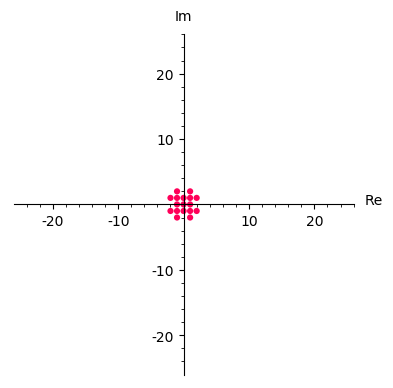

m =  3
32


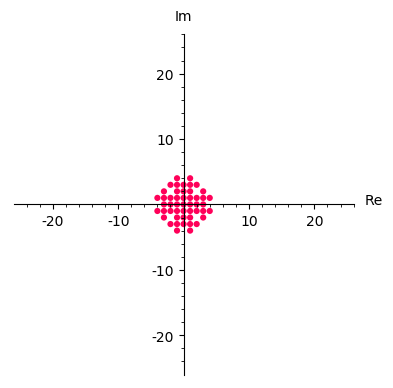

m =  4
76


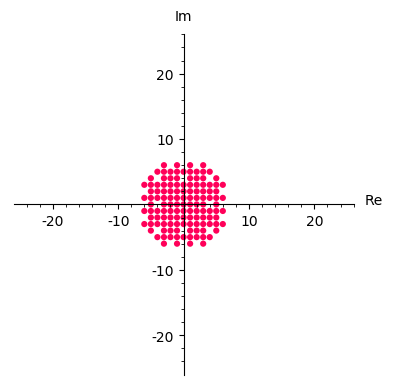

m =  5
172


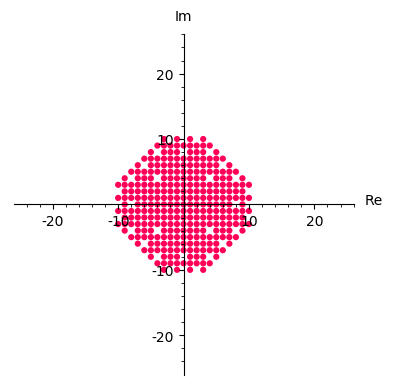

m =  6
372


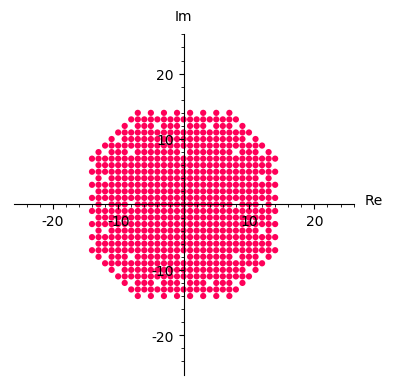

m =  7
788


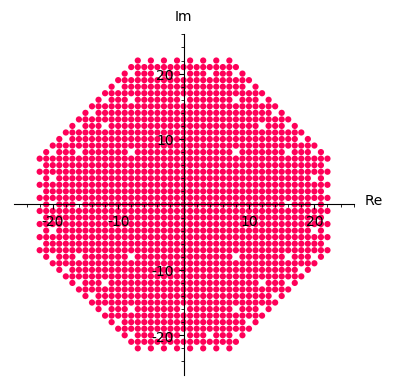

FINISHED


In [7]:
import numpy
Q = QQ['x']
x = Q.gen()

f = x**2+2*x+2 # redundant Penney system

print "Je ireducibilni: ", f.is_irreducible() #vypise jestli je dany polynom f ireducibilni nad Q

N.<beta> = NumberField(f) #vrati koren nejbliz k embedding
print N #vypise co je N a co je beta

A = [0, 1, -1, beta+1, -beta-1]

roots = beta.complex_embeddings()
print roots #vypise koreny polynomu f

pocetMimoK = 0
pozice = 0
for i in range(f.degree()):
    if abs(roots[i])>=1:
        pocetMimoK = pocetMimoK + 1
        pozice = i
        print pozice

pisot = 0
kPisot = 0

if (pocetMimoK == 2) & (not roots[pozice].is_real()): #zjisti jestli je beta Pisot nebo komplex Pisot
    print("Beta je komplex Pisot")
    kPisot = 1
    pozice = pozice - 1
elif (pocetMimoK == 1) & roots[pozice].is_real() & (beta > 1):
    print("Beta je Pisot")
    pisot = 1
else: 
    print("Beta neni ani Pisot ani komplex Pisot")
    
print N.places()
beta_complex = N.places()[pozice]  #better then it looks .. solves EVERYTHING!!!!!!!!!!!
print "beta = ", beta_complex(beta)

tau = beta

print ""
if (pisot == 1) or (kPisot==1): 

    spektrum = [] #mnozina PRVKU V TELESE ze spektra uvnitr
    spektrum = list(A)
    SS = [] #mnozina PUVODNICH HODNOT prvku ze spektra
    
########################################

    pocetPozic = 9
    radBeta = 8

########################################

    pomocna = [0 for i in range(pocetPozic)]
    for i in A: #PRIDA na zacatek mnoziny puvodnich hodnot ABECEDU
        pomocna[0] = i
        SS.append(list(pomocna))

    getSpectrumForM(spektrum, A, 7, -25, 25, -25, 25, 'penney.pdf')
#     getSpectrumForM(spektrum, A, 6, -5.5, 5.5, -5.5, 5.5, 'penneyGrid.pdf')
print "FINISHED"

Je ireducibilni:  True
Number Field in beta with defining polynomial x^2 + 2*x + 2
[-1.00000000000000 - 1.00000000000000*I, -1.00000000000000 + 1.00000000000000*I]
0
1
Beta je komplex Pisot
[Ring morphism:
  From: Number Field in beta with defining polynomial x^2 + 2*x + 2
  To:   Complex Field with 53 bits of precision
  Defn: beta |--> -1.00000000000000 + 1.00000000000000*I]
beta =  -1.00000000000000 + 1.00000000000000*I


 m =  1
5


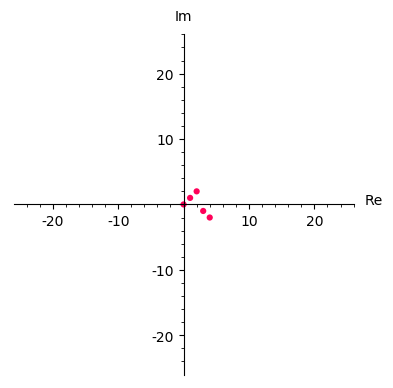

m =  2
20


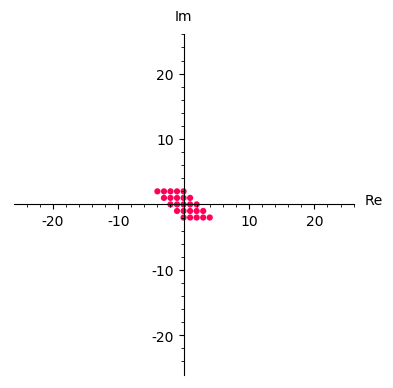

m =  3
64


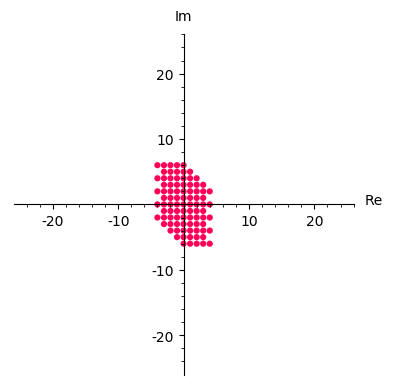

m =  4
152


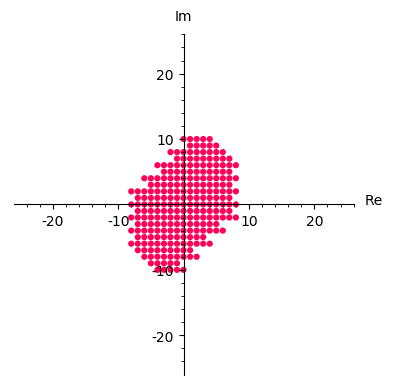

m =  5
336


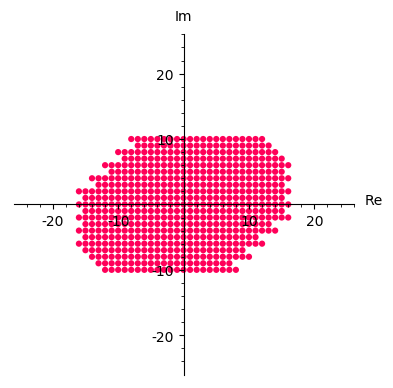

m =  6
720


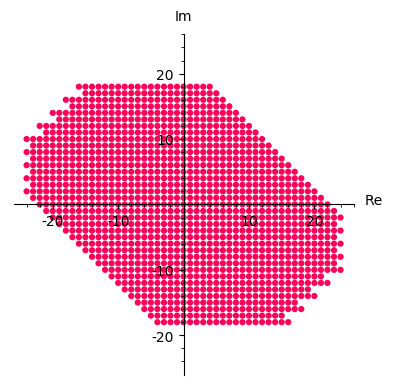

FINISHED


In [11]:
import numpy
Q = QQ['x']
x = Q.gen()

f = x**2+2*x+2 # Penney system with integer alphabet

print "Je ireducibilni: ", f.is_irreducible() #vypise jestli je dany polynom f ireducibilni nad Q

N.<beta> = NumberField(f) #vrati koren nejbliz k embedding
print N #vypise co je N a co je beta

A = [0, 1, 2, -1, -2]

roots = beta.complex_embeddings()
print roots #vypise koreny polynomu f

pocetMimoK = 0
pozice = 0
for i in range(f.degree()):
    if abs(roots[i])>=1:
        pocetMimoK = pocetMimoK + 1
        pozice = i
        print pozice

pisot = 0
kPisot = 0

if (pocetMimoK == 2) & (not roots[pozice].is_real()): #zjisti jestli je beta Pisot nebo komplex Pisot
    print("Beta je komplex Pisot")
    kPisot = 1
    pozice = pozice - 1
elif (pocetMimoK == 1) & roots[pozice].is_real() & (beta > 1):
    print("Beta je Pisot")
    pisot = 1
else: 
    print("Beta neni ani Pisot ani komplex Pisot")
    
print N.places()
beta_complex = N.places()[pozice]  #better then it looks .. solves EVERYTHING!!!!!!!!!!!
print "beta = ", beta_complex(beta)

tau = beta

print ""
if (pisot == 1) or (kPisot==1): 

    spektrum = [] #mnozina PRVKU V TELESE ze spektra uvnitr
    spektrum = list(A)
    SS = [] #mnozina PUVODNICH HODNOT prvku ze spektra
    
########################################

    pocetPozic = 9
    radBeta = 8

########################################

    pomocna = [0 for i in range(pocetPozic)]
    for i in A: #PRIDA na zacatek mnoziny puvodnich hodnot ABECEDU
        pomocna[0] = i
        SS.append(list(pomocna))

    getSpectrumForM(spektrum, A, 6, -25, 25, -25, 25, 'penneyInteger.pdf')
#     getSpectrumForM(spektrum, A, 5, -5.5, 5.5, -5.5, 5.5, 'penneyIntegerGrid.pdf')
            
print "FINISHED"

Je ireducibilni:  True
Number Field in beta with defining polynomial x^2 + 3*x + 3
[-1.50000000000000 - 0.866025403784439*I, -1.50000000000000 + 0.866025403784439*I]
0
1
Beta je komplex Pisot
[Ring morphism:
  From: Number Field in beta with defining polynomial x^2 + 3*x + 3
  To:   Complex Field with 53 bits of precision
  Defn: beta |--> -1.50000000000000 + 0.866025403784439*I]
beta =  -1.50000000000000 + 0.866025403784439*I
6.00000000000000


 m =  1
7


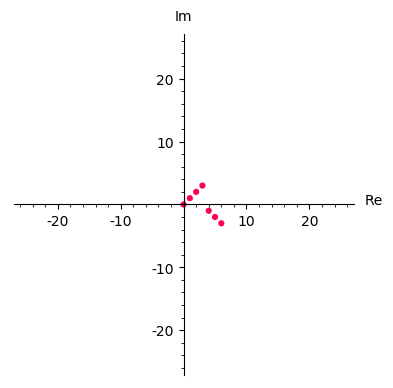

m =  2
42


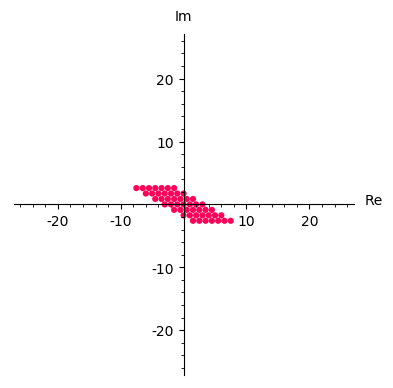

m =  3
198


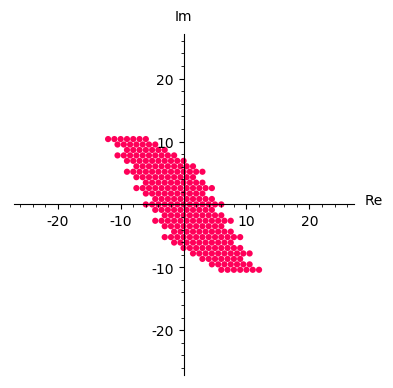

m =  4
738


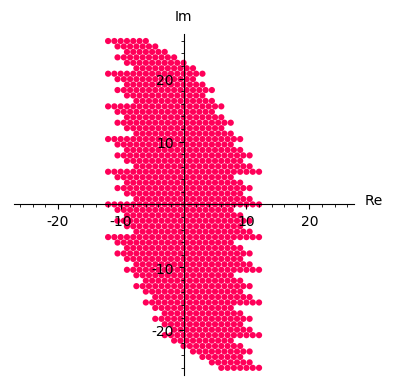

m =  5
2538


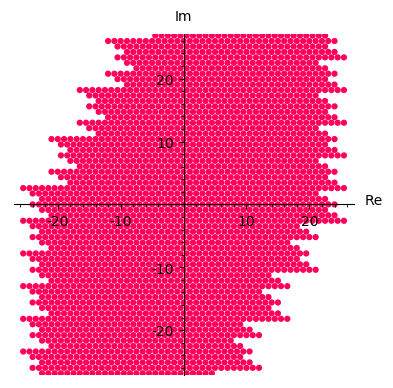

FINISHED


In [6]:
import numpy
Q = QQ['x']
x = Q.gen()

f = x**2+3*x+3 # Eisenstein system with integer alphabet

print "Je ireducibilni: ", f.is_irreducible() #vypise jestli je dany polynom f ireducibilni nad Q

N.<beta> = NumberField(f) #vrati koren nejbliz k embedding
print N #vypise co je N a co je beta

A = [0, 1, 2,3,-1,-2,-3]

roots = beta.complex_embeddings()
print roots #vypise koreny polynomu f

pocetMimoK = 0
pozice = 0
for i in range(f.degree()):
    if abs(roots[i])>=1:
        pocetMimoK = pocetMimoK + 1
        pozice = i
        print pozice

pisot = 0
kPisot = 0

if (pocetMimoK == 2) & (not roots[pozice].is_real()): #zjisti jestli je beta Pisot nebo komplex Pisot
    print("Beta je komplex Pisot")
    kPisot = 1
    pozice = pozice - 1
elif (pocetMimoK == 1) & roots[pozice].is_real() & (beta > 1):
    print("Beta je Pisot")
    pisot = 1
else: 
    print("Beta neni ani Pisot ani komplex Pisot")
    
print N.places()
beta_complex = N.places()[pozice]  #better then it looks .. solves EVERYTHING!!!!!!!!!!!
print "beta = ", beta_complex(beta)

tau = beta

print beta_complex(beta*beta.conjugate())  + abs(beta_complex(beta + beta.conjugate()))

print ""
if (pisot == 1) or (kPisot==1): 

    spektrum = [] #mnozina PRVKU V TELESE ze spektra uvnitr
    spektrum = list(A)
    SS = [] #mnozina PUVODNICH HODNOT prvku ze spektra

########################################

    pocetPozic = 9
    radBeta = 8

########################################

    pomocna = [0 for i in range(pocetPozic)]
    for i in A: #PRIDA na zacatek mnoziny puvodnich hodnot ABECEDU
        pomocna[0] = i
        SS.append(list(pomocna))

    getSpectrumForM(spektrum, A, 5, -26, 26, -26, 26, 'eisensteinInteger.pdf')
#     getSpectrumForM(spektrum, A, 4, -5.5, 5.5, -5.5, 5.5, 'eisensteinIntegerGrid.pdf')
print "FINISHED"